In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
%pylab inline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

Populating the interactive namespace from numpy and matplotlib
['final-year-project', 'date-palm-data']


In [2]:
from keras.layers.convolutional import *
from keras.layers.core import * 
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array,array_to_img
import cv2
from keras.layers.normalization import BatchNormalization

from sklearn.preprocessing import LabelBinarizer
import numpy as np
from keras.models import Sequential

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle


Using TensorFlow backend.


In [3]:
def concvert_to_array(pic):
    
    try:
        image = cv2.imread(pic)
        if image is not None:
            image =  cv2.resize(image,default_image_size)
            return img_to_array(image)
        else:
            return np.array([])
    except Exception as e:
        print(f"Error : {e} {pic}")
    return 0

In [4]:
image_list=[]
main_direct = '../cuurency_dataset/CUURENCY_DATASET'
label_list=[]
label_d_list=[]
image_d_list = []
label_binarizer = LabelBinarizer()
default_image_size = tuple((256, 256))
plant_disease_folder_list = []
plant_picture_folder_list = {}


try:
#     print('accessing files at the moment...')
    root_dir = os.listdir(main_direct)
    print(root_dir)
#     data = os.listdir(f"{main_direct}/{root_dir}")
#     print(data)
    for foldaername in root_dir:
        print(foldaername)
        plant_picture_folder_list[foldaername] = []
        plant_disease_folder_list.append(f"{main_direct}/{foldaername}")
    pass

    print(plant_disease_folder_list)
    
    for folder in plant_disease_folder_list:
        print(f"[INFO]  processing {folder.split('/')[5]}")
        for picture in os.listdir(folder):
            if picture == '.DS_Store':
                pass
            else:
                name = folder.split('/')[5]
                plant_picture_folder_list[name].append(f"{folder}/{picture}")
        label_list.append(name)
    for label in label_list:
        print(label)
        data = plant_picture_folder_list[label]
        img_in_array = []
        for pic in data:
            image_d_list.append(concvert_to_array(pic))
            img_in_array.append(concvert_to_array(pic))
            label_d_list.append(label)
        plant_picture_folder_list[label] = img_in_array          
        print(f'done with {label}')
except Exception as e:
    print(e)
    
print('Done processing')


['F_20N', 'B_20N', 'B_5N', 'F_100N', 'B_100N', 'F_10N', 'F_50N', 'F_200N', 'F_500N', 'B_10N', 'F_5N', 'B_500N', 'F_1000N', 'B_200N', 'B_1000N', 'B_50N']
F_20N
B_20N
B_5N
F_100N
B_100N
F_10N
F_50N
F_200N
F_500N
B_10N
F_5N
B_500N
F_1000N
B_200N
B_1000N
B_50N
['../input/final-year-project/cuurency_dataset/CUURENCY_DATASET/F_20N', '../input/final-year-project/cuurency_dataset/CUURENCY_DATASET/B_20N', '../input/final-year-project/cuurency_dataset/CUURENCY_DATASET/B_5N', '../input/final-year-project/cuurency_dataset/CUURENCY_DATASET/F_100N', '../input/final-year-project/cuurency_dataset/CUURENCY_DATASET/B_100N', '../input/final-year-project/cuurency_dataset/CUURENCY_DATASET/F_10N', '../input/final-year-project/cuurency_dataset/CUURENCY_DATASET/F_50N', '../input/final-year-project/cuurency_dataset/CUURENCY_DATASET/F_200N', '../input/final-year-project/cuurency_dataset/CUURENCY_DATASET/F_500N', '../input/final-year-project/cuurency_dataset/CUURENCY_DATASET/B_10N', '../input/final-year-project/

In [5]:
print('saving to data.pickle')
label_d_list = label_binarizer.fit_transform(label_d_list)

with open('data.pickle','wb') as file:
    pickle.dump(plant_picture_folder_list,file, protocol=pickle.HIGHEST_PROTOCOL)
    
print('saved to data.pickle')


saving to data.pickle
saved to data.pickle


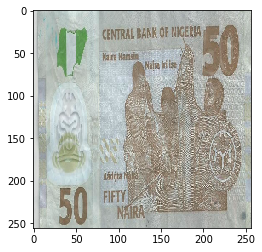

In [6]:
sample = plant_picture_folder_list[label][55]
plt.imshow(array_to_img(sample))
plt.show()
# print(array_to_img(sample))
# just to see what am doing

In [7]:
# for label in label_list:
#         data = plant_picture_folder_list[label]
#         image_d_list.extend(np.array(data,dtype=np.float16)/255)
#         print(image_d_list[2].shape)
        
image_d_list = np.array(image_d_list,dtype=np.float16)/ 225.0
print(label_d_list)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [8]:
EPOCHS = 25
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
# directory_root = '../input/plantvillage/'
width=256
height=256
depth=3


x_train, x_test, y_train, y_test = train_test_split(image_d_list, label_d_list, test_size=0.2, random_state = 42) 

In [9]:



model = Sequential()
inputShape = (height, width, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(16))
model.add(Activation("softmax"))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 256, 256, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 85, 85, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 85, 85, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 85, 85, 64)        0         
__________

In [11]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# distribution
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
# train the network
print("[INFO] training network...")

[INFO] training network...


In [12]:
history = model.fit(x_train, y_train, batch_size=BS, epochs=25, verbose=1, callbacks=None, validation_split=0.0, validation_data=(x_test, y_test), shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None)

Train on 666 samples, validate on 167 samples
Epoch 1/25
666/666 [==============================] - 16s 24ms/step - loss: 0.1081 - acc: 0.9672 - val_loss: 0.0519 - val_acc: 0.9828
Epoch 2/25
666/666 [==============================] - 7s 11ms/step - loss: 0.0163 - acc: 0.9954 - val_loss: 0.0410 - val_acc: 0.9876
Epoch 3/25
666/666 [==============================] - 7s 11ms/step - loss: 0.0141 - acc: 0.9954 - val_loss: 0.0896 - val_acc: 0.9693
Epoch 4/25
666/666 [==============================] - 7s 11ms/step - loss: 0.0130 - acc: 0.9961 - val_loss: 0.0255 - val_acc: 0.9914
Epoch 5/25
666/666 [==============================] - 7s 11ms/step - loss: 0.0087 - acc: 0.9975 - val_loss: 0.2247 - val_acc: 0.9562
Epoch 6/25
666/666 [==============================] - 7s 11ms/step - loss: 0.0157 - acc: 0.9944 - val_loss: 0.3575 - val_acc: 0.9465
Epoch 7/25
666/666 [==============================] - 7s 11ms/step - loss: 0.0113 - acc: 0.9967 - val_loss: 0.1635 - val_acc: 0.9805
Epoch 8/25
666/666 [==

In [13]:
loss,acc = model.evaluate(x_test,y_test)
print('loss ',loss)
print('accuracy ',acc)

167/167 [==============================] - 1s 4ms/step
loss  0.44631302142571544
accuracy  0.9094311370107229
